In [1]:
import numpy as np
import pandas as pd
import scipy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
df=pd.read_csv('data1/AB_NYC_2019.csv')

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Filling in the missing values 
df.fillna({'reviews_per_month':0},inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)

In [7]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

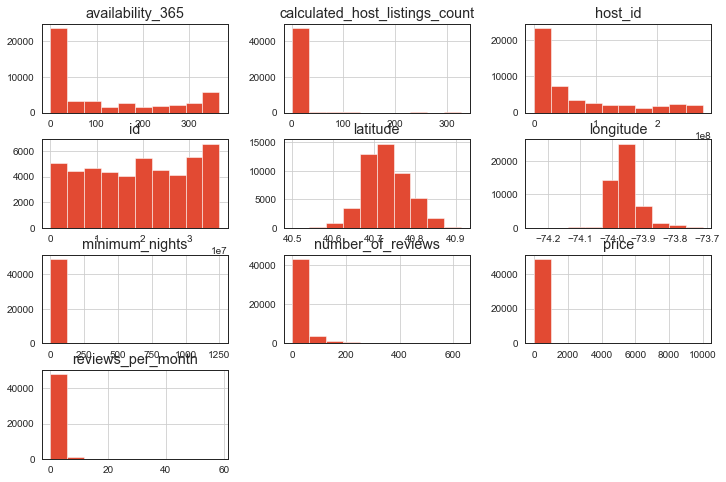

In [9]:
df.hist()
plt.show()

Text(0.5, 1.0, 'reviews_per_month')

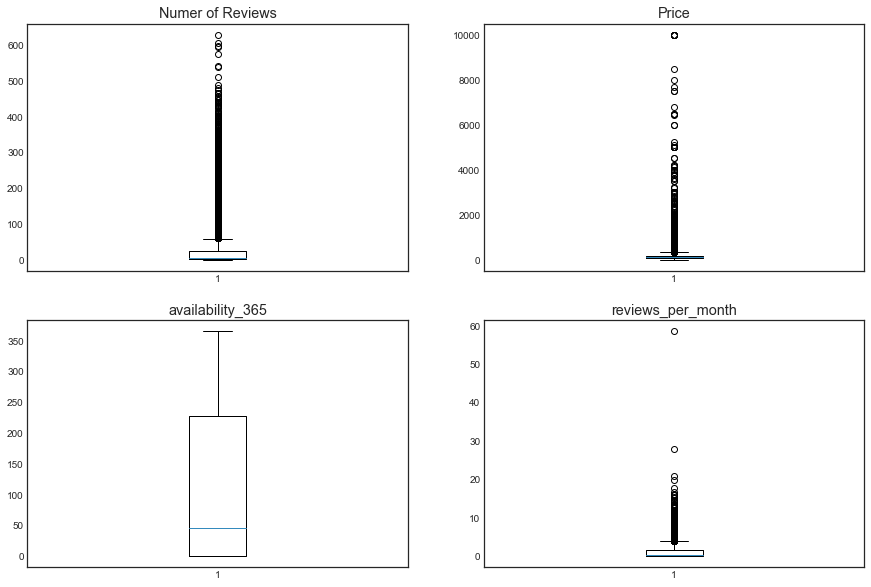

In [10]:

plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(df['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df['reviews_per_month'])
ax.set_title('reviews_per_month')

In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
airbnb1=df.loc[filter]

Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb1['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb2=airbnb1.loc[filter]


Q1 = airbnb2['reviews_per_month'].quantile(0.25)
Q3 = airbnb2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb2['reviews_per_month'] >= Q1 - 1.5 * IQR) & (airbnb2['reviews_per_month'] <= Q3 + 1.5 *IQR)
airbnb_new=airbnb2.loc[filter]

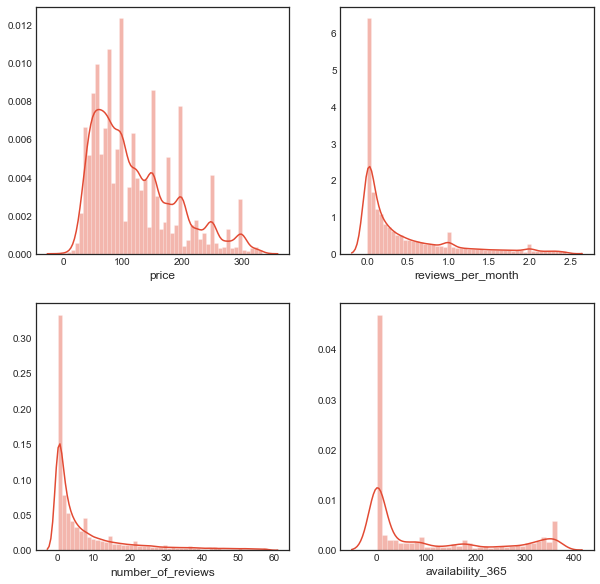

In [12]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.distplot(airbnb_new['price'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.distplot(airbnb_new['reviews_per_month'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.distplot(airbnb_new['number_of_reviews'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(224)
sns.distplot(airbnb_new['availability_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)

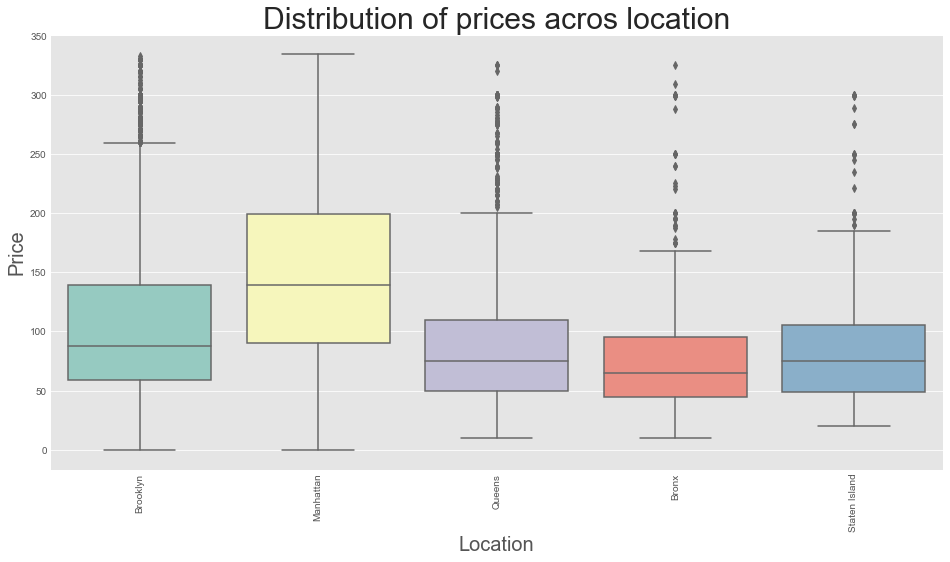

In [13]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = airbnb_new['neighbourhood_group'], y =airbnb_new['price'], data = airbnb_new, palette = 'Set3')
ax.set_xlabel(xlabel = 'Location', fontsize = 20)
ax.set_ylabel(ylabel = 'Price', fontsize = 20)
ax.set_title(label = 'Distribution of prices acros location', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

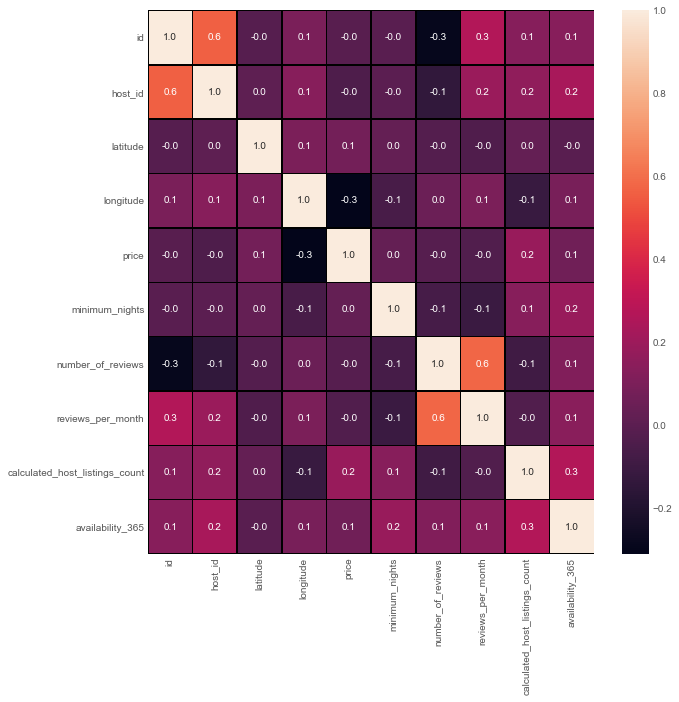

In [14]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(airbnb_new.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [15]:
#Preprocessing
airbnb_features=airbnb_new[['neighbourhood_group','room_type','availability_365','minimum_nights','calculated_host_listings_count','reviews_per_month','number_of_reviews']]
airbnb_features.head()

,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
0,Brooklyn,Private room,365,1,6,0.21,9
1,Manhattan,Entire home/apt,355,1,2,0.38,45
2,Manhattan,Private room,365,3,1,0.00,0
4,Manhattan,Entire home/apt,0,10,1,0.10,9
6,Brooklyn,Private room,0,45,1,0.40,49


In [16]:
#One hot encoding- Neighbourhood and Room type
#We can't preprocess the dataframe which has categorical data, so let's get some dummies instead of them

dummy_neighbourhood=pd.get_dummies(airbnb_features['neighbourhood_group'], prefix='dummy')
dummy_roomtype=pd.get_dummies(airbnb_features['room_type'], prefix='dummy')
airbnb_features = pd.concat([airbnb_features,dummy_neighbourhood,dummy_roomtype],axis=1)
airbnb_features.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)
airbnb_features

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,365,1,6,0.21,9,0,1,0,0,0,0,1,0
1,355,1,2,0.38,45,0,0,1,0,0,1,0,0
2,365,3,1,0.00,0,0,0,1,0,0,0,1,0
4,0,10,1,0.10,9,0,0,1,0,0,1,0,0
6,0,45,1,0.40,49,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,9,2,2,0.00,0,0,1,0,0,0,0,1,0
48891,36,4,2,0.00,0,0,1,0,0,0,0,1,0
48892,27,10,1,0.00,0,0,0,1,0,0,1,0,0
48893,2,1,6,0.00,0,0,0,1,0,0,0,0,1


In [17]:
#Standardizing our dataset + Setting Feature(X) and Target(y)
from sklearn import preprocessing
X=preprocessing.scale(airbnb_features)
y=airbnb_new.price
print(X)
print(y)

[[ 2.05772879 -0.32012801 -0.04432648 ... -0.99381927  1.04623811
  -0.16236422]
 [ 1.98104135 -0.32012801 -0.16550653 ...  1.00621917 -0.95580537
  -0.16236422]
 [ 2.05772879 -0.22909945 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]
 ...
 [-0.53430689  0.0895005  -0.19580154 ...  1.00621917 -0.95580537
  -0.16236422]
 [-0.7260255  -0.32012801 -0.04432648 ... -0.99381927 -0.95580537
   6.15899258]
 [-0.56498187 -0.04704234 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]]
0        149
1        225
2        150
4         80
6         60
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 36130, dtype: int64


In [18]:
X = pd.DataFrame(X)
X=X.rename(index=str, columns={0:'availability_365',1:'minimum_nights',2:'calculated_host_listings_count',3:'reviews_per_month',
                             4:'number_of_reviews',5:'dummy_Bronx',6:'dummy_Brooklyn',7:'dummy_Manhattan',8:'dummy_Queens',9:'dummy_Staten Island',
                             10:'dummy_Entire home/apt',11:'dummy_Private room',12:'dummy_Shared room'})
X.head()

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,2.057729,-0.320128,-0.044326,-0.411679,0.059627,-0.145597,1.166344,-0.881923,-0.353581,-0.083641,-0.993819,1.046238,-0.162364
1,1.981041,-0.320128,-0.165507,-0.123768,3.028170,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,1.006219,-0.955805,-0.162364
2,2.057729,-0.229099,-0.195802,-0.767335,-0.682508,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,-0.993819,1.046238,-0.162364
3,-0.741363,0.089500,-0.195802,-0.597975,0.059627,-0.145597,-0.857380,1.133885,-0.353581,-0.083641,1.006219,-0.955805,-0.162364
4,-0.741363,1.682500,-0.195802,-0.089896,3.358008,-0.145597,1.166344,-0.881923,-0.353581,-0.083641,-0.993819,1.046238,-0.162364


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,random_state=0))])

In [21]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

MAE scores:
 [39.24337539 38.05705821 37.01498814 37.85865875 43.03196765]
Average MAE score (across experiments): 39.04120963018335


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [25]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(train_X, train_y)
preds = model.predict(val_X)
print(mean_absolute_error(val_y, preds))

37.42072862606172


In [28]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

Mean Absolute error of the Model:
37.42072862606172


In [39]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(val_y).round(),
        'Predicted Values': preds.round()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,205,134.0
1,40,59.0
2,50,55.0
3,50,50.0
4,175,172.0
